<a href="https://colab.research.google.com/github/kaylay18/Coffee-Prediction/blob/main/Friday_Workshop_10_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from google.colab import files

# Loading dataset
uploaded = files.upload()
file_name = "Coffee order dataset.xlsx"
df = pd.read_excel(file_name)

# Print first few rows of dataset
df.head()

Saving Coffee order dataset.xlsx to Coffee order dataset (1).xlsx


,Token_0,Token_1,Token_2,Token_3,Token_4,Token_5,Token_6,Token_7,Token_8,Token_9,Label
0,103,436,861,271,107,72,701,21,615,122,Espresso
1,467,215,331,459,88,373,100,872,664,131,Espresso
2,662,309,770,344,492,414,806,386,192,956,Cappuccino
3,277,161,460,314,22,253,748,857,561,475,Espresso
4,59,511,682,476,700,976,783,190,958,687,Latte


In [3]:
df_encoded = pd.get_dummies(df, columns=['Label'])
df_encoded.head()

,Token_0,Token_1,Token_2,Token_3,Token_4,Token_5,Token_6,Token_7,Token_8,Token_9,Label_Cappuccino,Label_Espresso,Label_Latte
0,103,436,861,271,107,72,701,21,615,122,False,True,False
1,467,215,331,459,88,373,100,872,664,131,False,True,False
2,662,309,770,344,492,414,806,386,192,956,True,False,False
3,277,161,460,314,22,253,748,857,561,475,False,True,False
4,59,511,682,476,700,976,783,190,958,687,False,False,True


In [4]:
df_encoded = df_encoded.astype(int)
df_encoded.head()

,Token_0,Token_1,Token_2,Token_3,Token_4,Token_5,Token_6,Token_7,Token_8,Token_9,Label_Cappuccino,Label_Espresso,Label_Latte
0,103,436,861,271,107,72,701,21,615,122,0,1,0
1,467,215,331,459,88,373,100,872,664,131,0,1,0
2,662,309,770,344,492,414,806,386,192,956,1,0,0
3,277,161,460,314,22,253,748,857,561,475,0,1,0
4,59,511,682,476,700,976,783,190,958,687,0,0,1


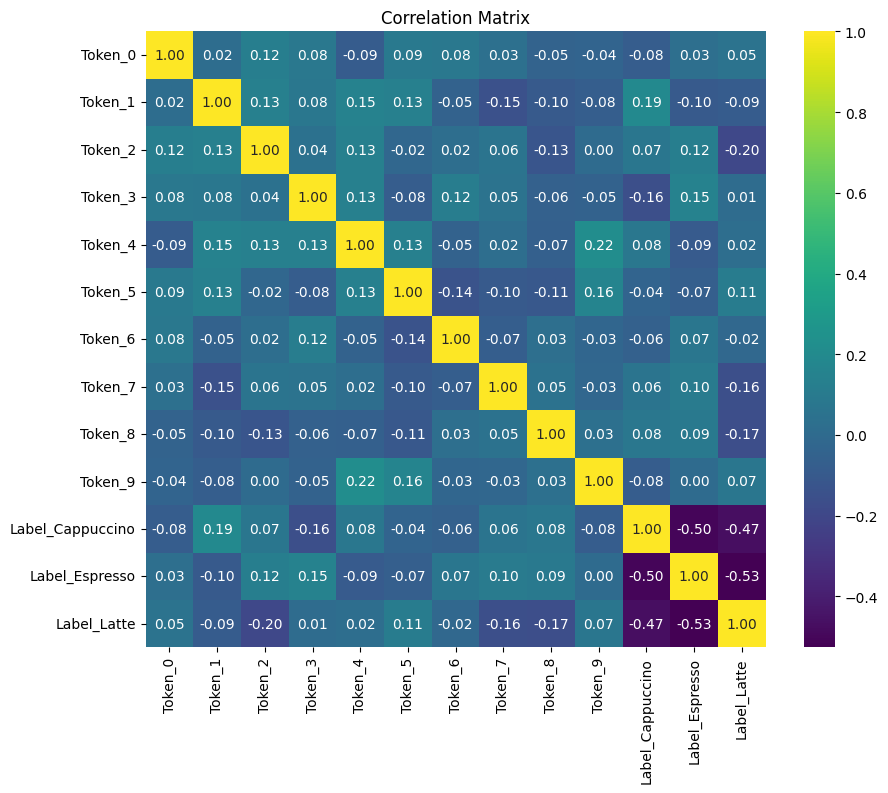

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

X = df_encoded.drop(['Label_Cappuccino', 'Label_Espresso', 'Label_Latte'], axis=1)
y = df_encoded[['Label_Cappuccino', 'Label_Espresso', 'Label_Latte']]

In [7]:
# Cross-validation setup
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model with mean squared error, mean absolute error, and R^2
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error: {mse:.2f}")

    mae = mean_absolute_error(y_test, y_pred)
    print(f"Mean Absolute Error: {mae:.2f}")

    r2 = r2_score(y_test, y_pred)
    print(f"R-squared: {r2:.2f}")

print(X_test.columns)

Mean Squared Error: 0.40
Mean Absolute Error: 0.40
R-squared: -0.87
Mean Squared Error: 0.50
Mean Absolute Error: 0.50
R-squared: -1.28
Mean Squared Error: 0.53
Mean Absolute Error: 0.53
R-squared: -1.76
Mean Squared Error: 0.47
Mean Absolute Error: 0.47
R-squared: -1.36
Mean Squared Error: 0.43
Mean Absolute Error: 0.43
R-squared: -0.96
Index(['Token_0', 'Token_1', 'Token_2', 'Token_3', 'Token_4', 'Token_5',
       'Token_6', 'Token_7', 'Token_8', 'Token_9'],
      dtype='object')


In [8]:
!pip install streamlit scikit-learn pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00


In [9]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

# Load your trained model (replace with your actual model and code to load it)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Define the input features for the bot
features = ['Token_0', 'Token_1', 'Token_2', 'Token_3', 'Token_4']

# Create the Streamlit app
st.title("Coffee Recommendation Bot")

# Get user input
user_input = {}
for feature in features:
    user_input[feature] = st.slider(feature, 0, 10, 5)

# Create a DataFrame from user input
input_df = pd.DataFrame([user_input])

# Make prediction using the loaded model
prediction = model.predict(input_df)

# Display the recommended coffee type
predicted_labels = ['Cappuccino', 'Espresso', 'Latte']
predicted_index = prediction[0].argmax()
st.write("Recommended coffee type:", predicted_labels[predicted_index])

Writing app.py


In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.46.22.149:8501

